<a href="https://colab.research.google.com/github/NeresWell/Analises-GeoEspaciais/blob/main/analise_fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue size=6>ANÁLISE GEOESPACIAL DA CIDADE DE ÁGUAS LINDAS DE GOIÁS</font>
***

#### <font color='blue'>Objetivo da Análise</font>
O objetivo principal da analise é mostrar como é simples montar seu proprio dataset para analisar dados geograficos. Neste exemplo eu montei um dataset com os dados de academias e centros de treinamentos de diferentes modalidades para verificar como estão distribuidos.
#### <font color='blue'>Modalidades identificadas</font>
#### <font color='red'>1º - Lutas</font>
Centro de Treinamentos focados em lutas e artes marciais como Karate, Jiu Jitsu, Capoeira, Defesa Pessoal, taekwondo, judô e outras.
#### <font color='red'>2º - Musculação</font>
Seu principal objetivo é promover a modelagem corporal, ganho de força e músculos.
#### <font color='red'>3º - Crossfit</font>
Crossfit consiste em uma atividade que abrange força e condicionamento físico por meio da junção de exercícios aeróbicos, calistênicos.
#### <font color='red'>4º - Treinamento Funcional</font>
Treinar o corpo para desenvolver capacidades funcionais necessárias às atividades da vida diária, como saltar, agachar, empurrar, puxar, correr, levantar e arremessar.
#### <font color='red'>5º - Fisioterapia</font>
Ciência da saúde que estuda, diagnostica, previne e trata os distúrbios, entre outros, cinético-funcionais decorrentes de alterações de órgãos e sistemas humanos
#### <font color='red'>6º - Geral</font>
Locais que realizam duas ou mais modalidades citadas anteriormente.
***

## <font color=blue>DATASET DO PROJETO</font>
***
### Instituto Brasileiro de Geografia e Estatística
A Malha Municipal Digital, representa a visão mais atualizada do IBGE no que se refere à abrangência espacial de cada um dos municípios brasileiros.

### Dados Geograficos da Cidade de Águas Lindas de Goiás
Dataset criado e disponibilizado pelo autor do post(eu) no github, mas a orientação é que você crie o seu proprio dataset com as cordenadas geoEspaciais dos locais que você tem interesse de realizar alguma análise.

### Fonte dos Dados
Municipios: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais

Centros de Treinamento: https://github.com/NeresWell/Analises-GeoEspaciais/raw/refs/heads/main/projetos/analise_fitness/dataset_fit.csv


## <font color=blue>METODOLOGIA DE ANÁLISE</font>
***
Utilizei mapas das bibliotecas mais populares para analises de dados geoespaciais(eu acho), são elas, GeoPandas e Folium. Os mapas nesse caso são mais eficientes porque é possível visualizar a distribuição geográfica dos dados e identificar padrões que não seriam evidentes em tabelas ou gráficos tradicionais.

#### <font color='blue'>Como criar um dataset com dados geoEspaciais?</font>
Se você tem interesse de criar a mesma analise com as coordenadas de qualquer lugar da sua cidade ou do mundo você pode construir um dataset com as coordenadas que podem ser obtidas nos sites listados abaixo.

1. No google maps seguindo este [tutorial](https://support.google.com/maps/answer/18539?hl=pt-BR&co=GENIE.Platform%3DDesktop).
2. [Bing maps](https://www.bing.com/maps?cc=br&cp=-15.769127%7E-48.272552&lvl=11.0), a forma de obter os dados geograficos é semelhante ao google maps.
3. Site [Coordenadas GPS](https://www.coordenadas-gps.net/#google_vignette), basta clicar no local que o site mostra a latitude e longitude.

## <font color=blue>PRINCIPAIS DESCOBERTAS</font>
***

#### <font color='red'>1º - Existe muita oportunidade para Modalidades especificas como Crossfit, Fisioterapia e Natação.</font>

#### <font color='red'>2º - Pontos com grande concentração de habitantes(condominios e apartamentos) que não tem academia proxima da residencia e precisam se deslocar por uma distancia consideravel.</font>

#### <font color='red'>3º - A modalidade Lutas e Geral representam 77% dos centros de treinamentos da cidade.</font>

#### <font color='red'>4º - A cidade possui uma população estimada(2024) de 240.613 habitantes e a quantidade de centros de treinamento conhecidos somam 57 unidades.</font>

# <font color=blue>ANÁLISE COM A BIBLIOTECA FOLIUM</font>

In [5]:
import pandas as pd
import folium

In [6]:
df = pd.read_csv("dataset_fit.csv")
df.head()

,nome,tipo,lat,lng,zip_code,city,state
0,SmartFit,Geral,-15.735600,-48.285057,72910000,ÁguasLindasdeGoiás,GO
1,Estação Family,Geral,-15.740899,-48.269745,72911199,ÁguasLindasdeGoiás,GO
2,Life Fit,Geral,-15.743435,-48.273511,72911202,ÁguasLindasdeGoiás,GO
3,VillaFit,TreinamentoFuncional,-15.729015,-48.268506,72916218,ÁguasLindasdeGoiás,GO
4,Evolve,Geral,-15.735591,-48.274403,72915705,ÁguasLindasdeGoiás,GO


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nome      57 non-null     object 
 1   tipo      57 non-null     object 
 2   lat       57 non-null     float64
 3   lng       57 non-null     float64
 4   zip_code  57 non-null     int64  
 5   city      57 non-null     object 
 6   state     57 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ KB


In [7]:
# definindo as cores para cada categoria da coluna tipo
cores = {
    'Geral': 'red',
    'Lutas': 'blue',
    'Musculação': 'green',
    'Crossfit': 'black',
    'TreinamentoFuncional': 'yellow',
    'Fisioterapia': 'pink'
}


In [8]:
# criando um mapa centralizado na cordenada central da cidade
mapa = folium.Map(location=[-15.739558396737985, -48.28293834216376], zoom_start=13)

# adicionar os pontos com as cores de acordo com a categoria e um rotulo simples para identificar o nome do local
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lng']),
        popup=row['nome'],
        radius=6,
        color=cores[row['tipo']],
        fill=True,
        fill_color=cores[row['tipo']],
        fill_opacity=0.6
    ).add_to(mapa)

# mostra o mapa
mapa

In [54]:
# criando para cada categoria
legenda_html = '''
<div style="position: fixed;
            bottom: 20px; left: 20px; width: 200px; height: 200px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
<b>Legenda</b><br>
&nbsp;<i style="background:red; width:10px; height:10px; float:left; margin-right:5px;"></i> Geral<br>
&nbsp;<i style="background:blue; width:10px; height:10px; float:left; margin-right:5px;"></i> Lutas<br>
&nbsp;<i style="background:green; width:10px; height:10px; float:left; margin-right:5px;"></i> Musculação<br>
&nbsp;<i style="background:black; width:10px; height:10px; float:left; margin-right:5px;"></i> Crossfit<br>
&nbsp;<i style="background:yellow; width:10px; height:10px; float:left; margin-right:5px;"></i> TreinamentoFuncional<br>
&nbsp;<i style="background:pink; width:10px; height:10px; float:left; margin-right:5px;"></i> Fisioterapia
</div>
'''

# adicionar a legenda ao mapa
mapa.get_root().html.add_child(folium.Element(legenda_html))

# exporta o mapa no formato HTML
mapa.save("mapa_fitness.html")

# <font color=blue>MESMA ANÁLISE COM A BIBLIOTECA GEOPANDAS</font>

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv("dataset_fit.csv")
df.head()

,nome,tipo,lat,lng,zip_code,city,state
0,SmartFit,Geral,-15.735600,-48.285057,72910000,ÁguasLindasdeGoiás,GO
1,Estação Family,Geral,-15.740899,-48.269745,72911199,ÁguasLindasdeGoiás,GO
2,Life Fit,Geral,-15.743435,-48.273511,72911202,ÁguasLindasdeGoiás,GO
3,VillaFit,TreinamentoFuncional,-15.729015,-48.268506,72916218,ÁguasLindasdeGoiás,GO
4,Evolve,Geral,-15.735591,-48.274403,72915705,ÁguasLindasdeGoiás,GO


In [11]:
# criando uma coluna de geometrias de ponto (latitude, longitude) para o GeoPandas interpretar e plotar
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [12]:
# dados dos municipios
shape_file = '/content/drive/MyDrive/Colab Notebooks/Alura/geopandas/dados_politica/BR_Municipios_2022/BR_Municipios_2022.shp'
municipios = gpd.read_file(shape_file)

In [13]:
# filtrando a cidade 'águas lindas de goiás' para um novo dataset
gdf_aguas_lindas = municipios[municipios['NM_MUN'] == 'Águas Lindas de Goiás']

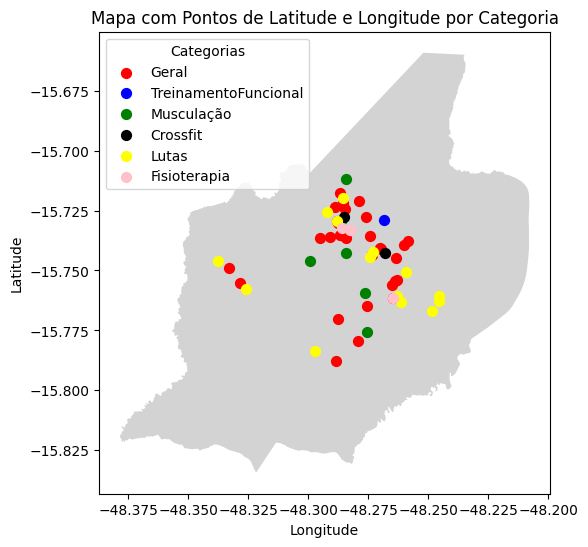

In [14]:
# plotando o mapa do novo dataset com apenas os dados do municipio de 'águas lindas de goiás'
fig, ax = plt.subplots(figsize=(10, 6))
gdf_aguas_lindas.plot(ax=ax, color='lightgray')

# cores para cada categoria da coluna 'tipo'
categories = geo_df['tipo'].unique()
colors = ['red', 'blue', 'green','black','yellow','pink']

for category, color in zip(categories, colors):
    subset = geo_df[geo_df['tipo'] == category]
    subset.plot(ax=ax, color=color, markersize=50, label=category)

# título, legenda e rótulos dos eixos
plt.title("Mapa com Pontos de Latitude e Longitude por Categoria")
plt.legend(title="Categorias")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()